<a href="https://colab.research.google.com/github/PallaviVangari/DataMiningAssignment5/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# It seems that the kernel has been reset, and we lost the context. Let's re-import the necessary libraries and reload the dataset
import pandas as pd

# Loading the time series dataset
file_path_time_series = "/content/sample_data/TimeSeries.dat"
column = ['value']
time_series_data = pd.read_csv(file_path_time_series, sep='\t', header=None, names=column)


# Display the first few rows of the dataset
time_series_data.head()



,value
0,# x01.txt
1,#
2,# Reference:
3,#
4,"# Helmut Spaeth,"


In [8]:
# Extracting numerical data from the dataset
numerical_data = time_series_data['value'].str.extract('(\d+[\.\d+]*\s+\d+[\.\d+]*)')

# Splitting the extracted data into separate columns
numerical_data = numerical_data[0].str.split(expand=True)

# Converting the columns to numeric
numerical_data = numerical_data.apply(pd.to_numeric, errors='coerce')

# Dropping rows with missing values
numerical_data = numerical_data.dropna()

# Renaming the columns
numerical_data.columns = ['Brain_Weight', 'Body_Weight']

# Displaying the first few rows of the numerical data
numerical_data.head()


,Brain_Weight,Body_Weight
33,1.0,3.385
34,2.0,0.480
35,3.0,1.350
36,4.0,465.000
37,5.0,36.330


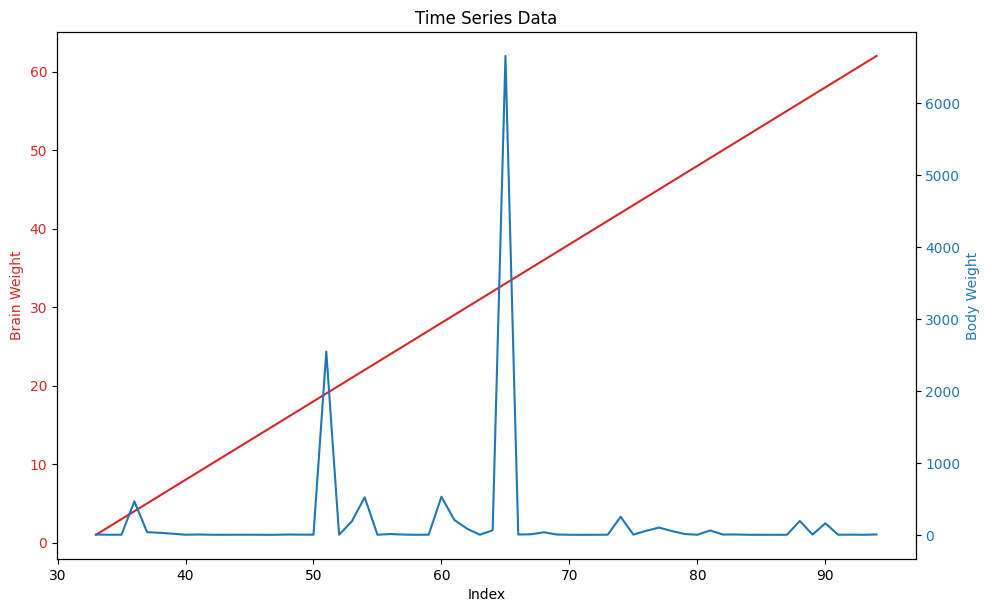

In [9]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt

# Visualizing the time series data
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Index')
ax1.set_ylabel('Brain Weight', color=color)
ax1.plot(numerical_data.index, numerical_data['Brain_Weight'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Body Weight', color=color)
ax2.plot(numerical_data.index, numerical_data['Body_Weight'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Time Series Data')
plt.show()


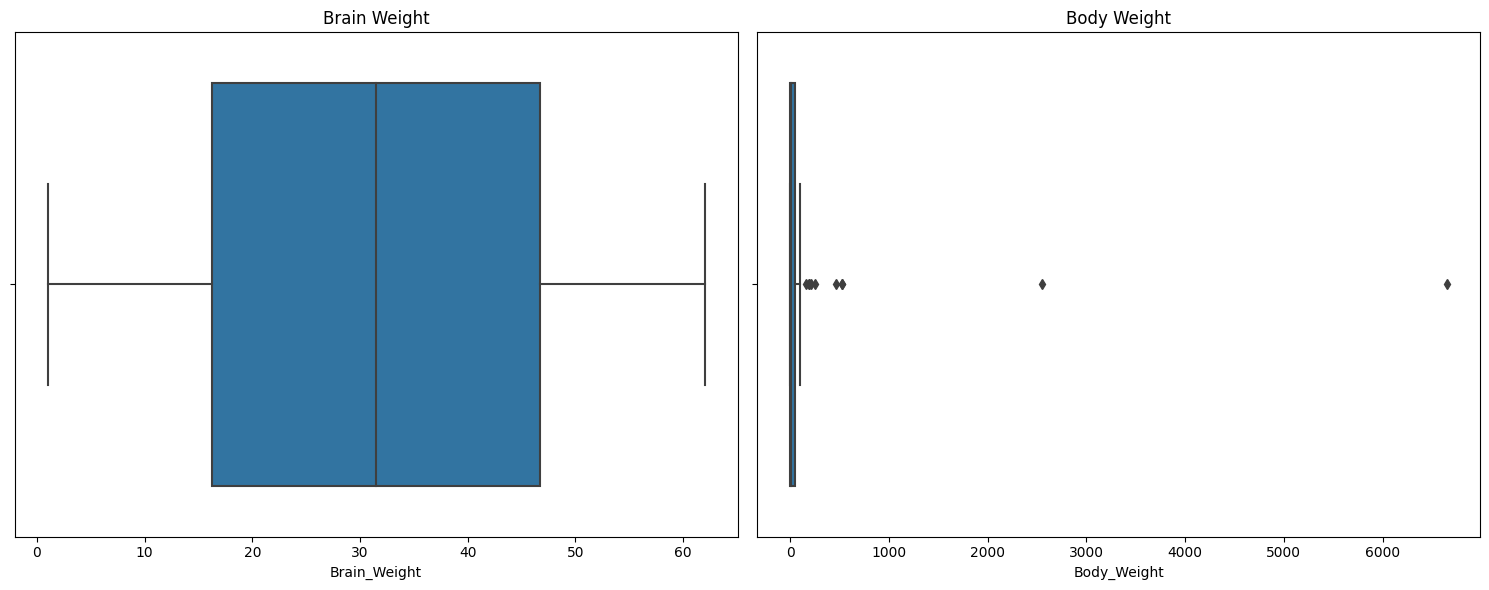

In [10]:
# Importing necessary libraries for visualization
import seaborn as sns

# Checking for outliers using boxplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Brain Weight
sns.boxplot(ax=axes[0], x=numerical_data['Brain_Weight'])
axes[0].set_title('Brain Weight')

# Body Weight
sns.boxplot(ax=axes[1], x=numerical_data['Body_Weight'])
axes[1].set_title('Body Weight')

plt.tight_layout()
plt.show()


In [12]:
def replace_outliers(series, multiplier=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    outliers = ((series < lower_bound) | (series > upper_bound))
    series[outliers] = series.median()
    return series


In [13]:
numerical_data['Brain_Weight'] = replace_outliers(numerical_data['Brain_Weight'])
numerical_data['Body_Weight'] = replace_outliers(numerical_data['Body_Weight'])


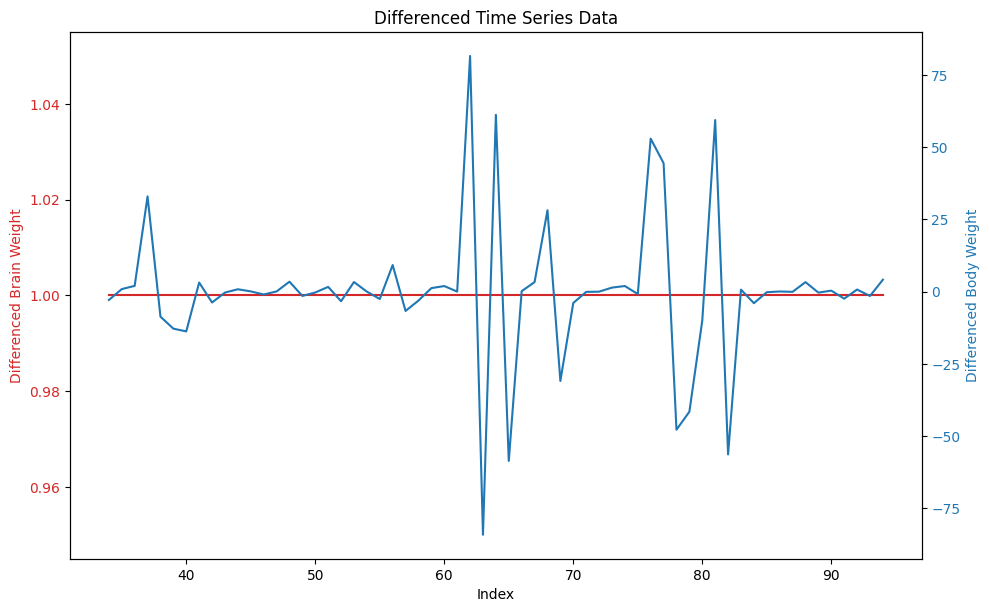

In [14]:
# Data Transformation

# Differencing the 'Brain_Weight' and 'Body_Weight' columns to make the data stationary
numerical_data_diff = numerical_data.diff().dropna()

# Visualizing the differenced data
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Index')
ax1.set_ylabel('Differenced Brain Weight', color=color)
ax1.plot(numerical_data_diff.index, numerical_data_diff['Brain_Weight'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Differenced Body Weight', color=color)
ax2.plot(numerical_data_diff.index, numerical_data_diff['Body_Weight'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Differenced Time Series Data')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integ

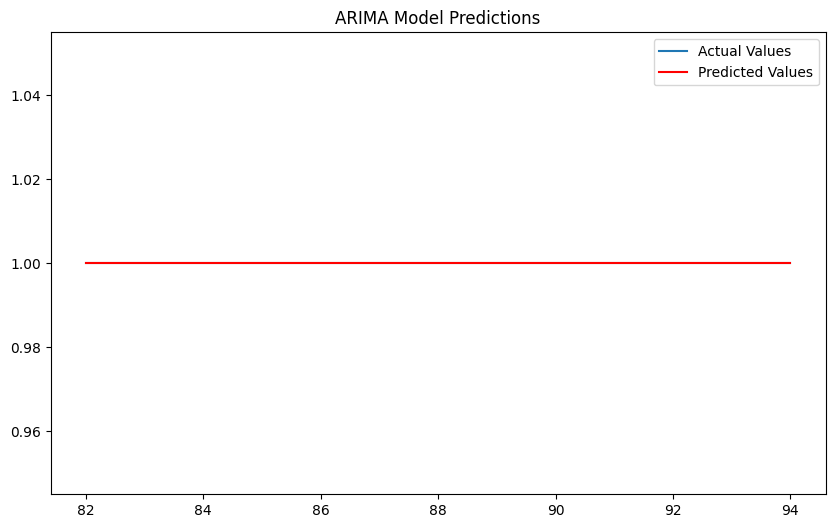

In [15]:
# Importing necessary libraries for ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Splitting the data into training and test sets
train_size = int(len(numerical_data_diff) * 0.8)
train_data = numerical_data_diff['Brain_Weight'][:train_size]
test_data = numerical_data_diff['Brain_Weight'][train_size:]

# Building the ARIMA model
arima_model = ARIMA(train_data, order=(5,1,0))
arima_fit = arima_model.fit()

# Making predictions on the test set
predictions = arima_fit.forecast(steps=len(test_data))

# Visualizing the predictions vs actual values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(test_data.index, test_data, label='Actual Values')
ax.plot(test_data.index, predictions, label='Predicted Values', color='red')
ax.set_title('ARIMA Model Predictions')
ax.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(input, 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

model.fit(train_data, train_labels, epochs=100, batch_size=32, validation_data=(test_data, test_labels))
# done the above tarining in local